In [ ]:
# TODO Artificial Neural Network
# 
# Load features from file, then apply model
# Try diff params, give accuracies, misclassification rates for each dataset
# Plot confusion matrix, ROC, DET
# Inbuilt libraries ALLOWED
# Do on three forms of data -- normal, after PCA, after LDA

# Artificial Neural Networks on Synthetic Data

In [1]:
# Importing of Important Packages
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neural_network as nn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
syn_train = np.loadtxt("Data/Synthetic/train.txt",delimiter=",")
syn_dev = np.loadtxt("Data/Synthetic/dev.txt",delimiter=",")

In [112]:
X_train_syn = syn_train[:,0:2]
y_train_syn = syn_train[:,2]
X_dev_syn = syn_dev[:,0:2]
y_dev_syn = syn_dev[:,2]

# Create the ANN Classifier
classifier = make_pipeline(StandardScaler(), nn.MLPClassifier(solver='adam', alpha=1e-4,hidden_layer_sizes=(20, 15, 10), max_iter=1000))

# Fit the data to X and y
classifier.fit(X_train_syn,y_train_syn)
preds = classifier.predict(X_dev_syn)

In [113]:
# Calculate Accuracy:
errs = preds - y_dev_syn
mistakes = np.count_nonzero(errs)
print(mistakes)
acc = 1 - mistakes/(len(y_dev_syn))
print(f"Accuracy = {acc}")

1
Accuracy = 0.999


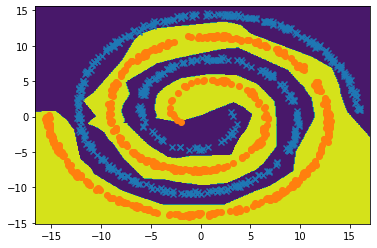

In [114]:
def contour_plot(classifier, x2d, y2d):
    z_plot = classifier.predict(np.c_[x2d.ravel(),y2d.ravel()]).reshape(x2d.shape)
    plt.contourf(x2d,y2d,z_plot)
def make_meshgrid(x, y, h=0.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
x_plot, y_plot = make_meshgrid(X_train_syn[:,0], X_train_syn[:,1])
contour_plot(classifier,x_plot,y_plot)
plt.scatter(X_dev_syn[:500,0],X_dev_syn[:500,1],marker="x")
plt.scatter(X_dev_syn[500:,0],X_dev_syn[500:,1],marker="o")
plt.show()

In [ ]:
# Take command line args
# feature type - normal, LDA, PCA
# dataset - Image, Synthetic, IsolatedDigits, HandwrittenCharacters